In [1]:
# import the necessary packages

import sklearn
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the csv file that we downloaded from kaggle.
# Remember when specifiying the file path you need to make double backward slash instead of single backward slash

df_original= pd.read_csv('C:\\Users\\freta\\Desktop\\BCA_Capstone_2_doc\\data.csv')

df_original.head()
df_original.columns

# We got 32 columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
# Check the shape of the dataframe

df_original.shape

#  It has 569 rows and 33 columns


# Drop the unnecessary columns 'id', and 'Unnamed'

bca_df = df_original.drop(['id', 'Unnamed: 32'], axis=1)
bca_df.shape

# After we removed these two columns we have 569 observations and 31 columns.

(569, 31)

In [4]:
# Round all the columns to 4 decimal places

bca_df = round(bca_df, 4)

# Check the columns names for any spaces, case

bca_df.columns

#  There is no spaces and all are in lower cases.



Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
# Let's deeply explore our dataframe using the .info() method so that we can check the missing values by looking at the
# ...total number of observations for each columns, as well as the data types of each colulmns.

bca_df.info()

# All the columns have 569 non-null values indicating that we have no missing values.
# Moreover, all of the freatures are of datadtype'float64' except the variable 'diagnosis' which is 'object'



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

## Attribute Information:

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [6]:
# Let's further check for any missing value 

bca_df.isnull().any().sum()

#  We can see from the result that our data is completely free from any missing value.

0

# Understanding Target Variable

In [7]:
# Count the target variable('diagnosis') to check the frequency of each classes and explore about the classes as well.

bca_df.diagnosis.value_counts()

# The variable 'diagnosis' is our target variable. It is an integer with values of M representing Malignat/cancer and 
# .... B representing benign/non-cancer.

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
# Replace the value 'B' to 0 and 'M' to 1

bca_df['diagnosis'] = bca_df['diagnosis'].map({'M':1,'B':0})
bca_df.head()

# As we can see from the table below, the classes of the target variable are now labeled as 0 and 1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,1,20.57,17.77,132.90,1326.0,0.0847,0.0786,0.0869,0.0702,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,1,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,1,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


([<matplotlib.axis.XTick at 0x21923b38308>,
 <a list of 2 Text xticklabel objects>)

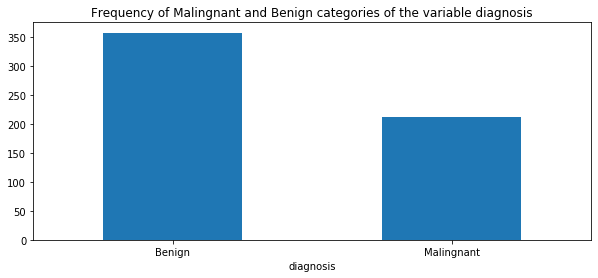

In [9]:
# Visualize the target variable

plt.figure(figsize=(10, 4))
bca_df.groupby(['diagnosis'])['diagnosis'].count().plot.bar()
plt.title("Frequency of Malingnant and Benign categories of the variable diagnosis")
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)


## Observation

- The total number of samples that are benign are 357, while that of malignant/cancerous is 212. 
- The proportion of malignant in our dataset is unusually large as compared to the real world proportion of malignancy in which most masses are benign. However, this larger proportion of malignant cases is so important for our deep neural network as it needs a balanced data to learn well.


# To check Outliers

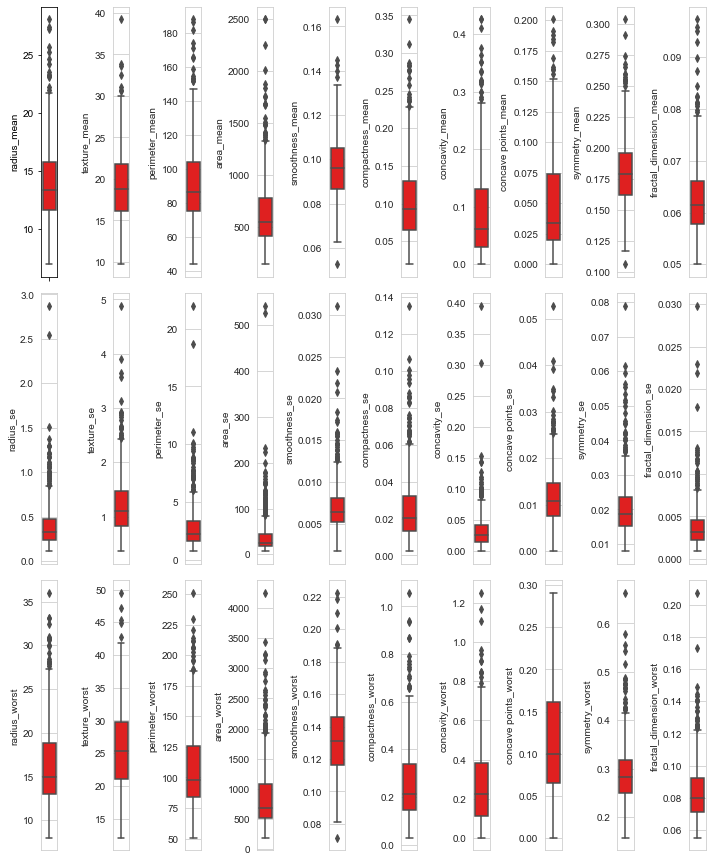

In [10]:
# Below we will check the 10 real valued features for outliers
# Outliers are data values that are far away from other data values. 
# It is important to check for the presence of such values in all of the features as they are prone to affect our prediction.


df_features=bca_df.drop(['diagnosis'], axis=1)

feature_list = df_features.columns.values

number_of_columns=10
number_of_rows = len(feature_list)-1/number_of_columns


plt.figure(figsize=(number_of_columns,4*number_of_rows))
for i in range(0,len(feature_list)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_features[feature_list[i]],color='red',orient='v')
    plt.tight_layout()
    
   


-The black dot above or below the whiskers indicate the presence of outlier. All the five features have outliers.

-Specifically, while all features have only extremely large values(one direction), the 'smoothness_mean' feature
has both extremely large and extremely small values as indicated by the dots in both direction


# To check distribution-Skewness

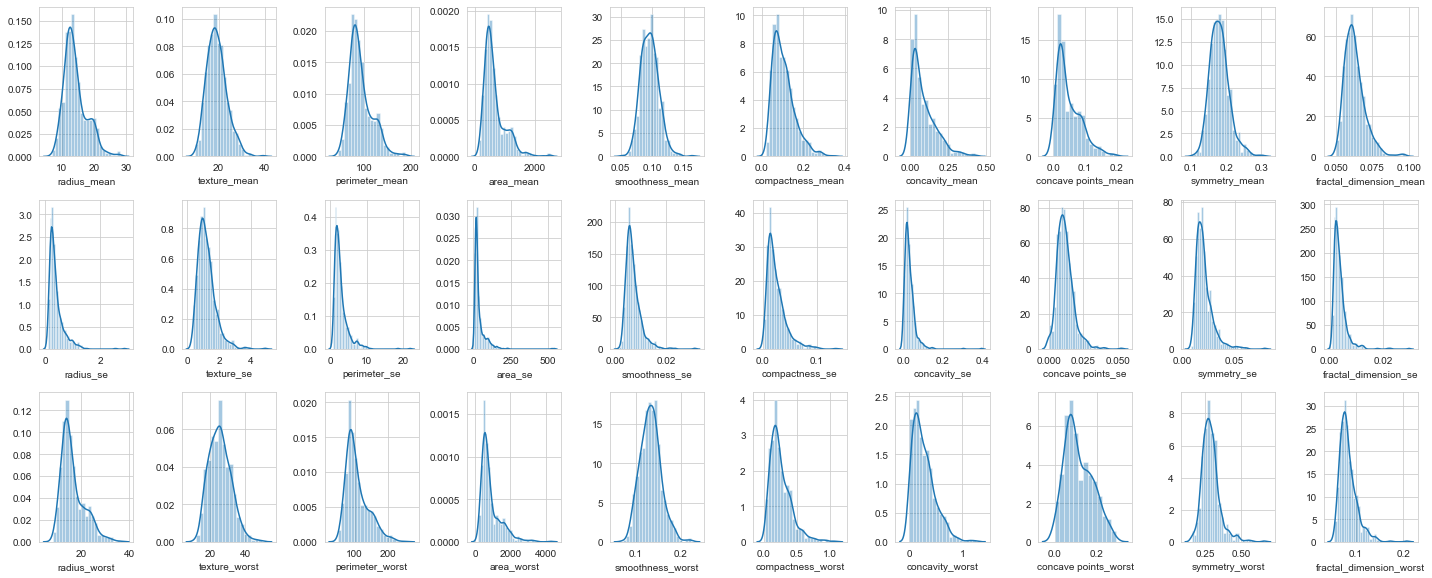

In [11]:
# Check whether the distribution of the features is normal or skewed



plt.figure(figsize=(20,80))
for i in range(0,len(feature_list)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    plt.tight_layout()
    sns.distplot(df_features[feature_list[i]],kde=True)

- 'texture_mean', 'smoothness_mean', 'symmetry_mean' 'texture_worst', 'smoothness_worst', 'symmetry_worst', 'concave points_se'  appear to be normally distributed. 


- It is also witnessed by the box plot displayed above that the median(middle line) of the box lies at the center between q1 and q3.


- On the other hand, the rest features are slightly skewed to the right.
 

# Summary Statistics

In [12]:
# Check the summary statustics for the dataframe

df_features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088801,0.048918,0.181162,0.062797,...,16.269190,25.677223,107.261213,880.583128,0.132368,0.254265,0.272188,0.114606,0.290076,0.083945
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079719,0.038801,0.027414,0.007059,...,4.833242,6.146258,33.602542,569.356993,0.022833,0.157336,0.208625,0.065732,0.061867,0.018062
min,6.981000,9.710000,43.790000,143.500000,0.052600,0.019400,0.000000,0.000000,0.106000,0.050000,...,7.930000,12.020000,50.410000,185.200000,0.071200,0.027300,0.000000,0.000000,0.156500,0.055000
25%,11.700000,16.170000,75.170000,420.300000,0.086400,0.064900,0.029600,0.020300,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064900,0.250400,0.071500
50%,13.370000,18.840000,86.240000,551.100000,0.095900,0.092600,0.061500,0.033500,0.179200,0.061500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099900,0.282200,0.080000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066100,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092100
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097400,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# To be more specific let's check the difference b/n the 95th percentile and maximum value, and
# ...5th percentile and minimum value

df_features.quantile([0.0, 0.05, 0.95, 1])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0.00,6.9810,9.710,43.790,143.50,0.05260,0.01940,0.00000,0.00000,0.10600,0.05000,...,7.930,12.020,50.410,185.20,0.07120,0.02730,0.00000,0.00000,0.15650,0.05500
0.05,9.5292,13.088,60.496,275.78,0.07508,0.04066,0.00500,0.00564,0.14150,0.05394,...,10.534,16.574,67.856,331.06,0.09572,0.07118,0.01832,0.02428,0.21270,0.06254
0.95,20.5760,27.150,135.820,1309.80,0.11878,0.20870,0.24302,0.12574,0.23072,0.07606,...,25.640,36.300,171.640,2009.60,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952
1.00,28.1100,39.280,188.500,2501.00,0.16340,0.34540,0.42680,0.20120,0.30400,0.09740,...,36.040,49.540,251.200,4254.00,0.22260,1.05800,1.25200,0.29100,0.66380,0.20750


### Observation

- From the summary statistics displayed above, we can understand that the mean of 'mean_smoothness', 'compactness_mean', 'symmetry_mean', 'mean_texture', 'symmetry_mean', 'symmetry_worst', 'smoothness_worst', 'texture_worst' is almost same to the median represented by the 50%.


- Whereas the mean of the rest features is different from the median represented by the 50%.


- Besides, there is notably large difference between the maximum value and the 75 percentile(75%) of the feature 'perimeter_mean','area_mean', 'area_se', 'perimeter_se', 'perimeter_worst', and 'area_worst'.


- In addition, there is also big difference between 95 percentile and maximum value for 'perimeter_mean','area_mean', 'area_se', 'perimeter_se', 'perimeter_worst', and 'area_worst'.


- Hence, we can conclude that  features such as 'perimeter_mean','area_mean', 'area_se', 'perimeter_se', 'perimeter_worst', and 'area_worst' has outliers. 


- We will handle the outliers later.


# VISUAL EXPLORATORY DATA ANALYSIS(EDA) OF FEATURES WITHRESPECT TO THE TARGET VARIABLE

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- In the section below, we will present the Visual EDA of each of the all the 30 features, by calculating the mean of each features across each class of the target variable as well as drawing plot.

## Mean Radius



In [14]:

bca_df.groupby(['diagnosis'])['radius_mean'].mean()


diagnosis
0    12.146524
1    17.462830
Name: radius_mean, dtype: float64

In [15]:
# Classify our dataset into malignant and benign for the sake of comparison

df_malignant = bca_df[bca_df.diagnosis==1]
df_benign = bca_df[bca_df.diagnosis==0]

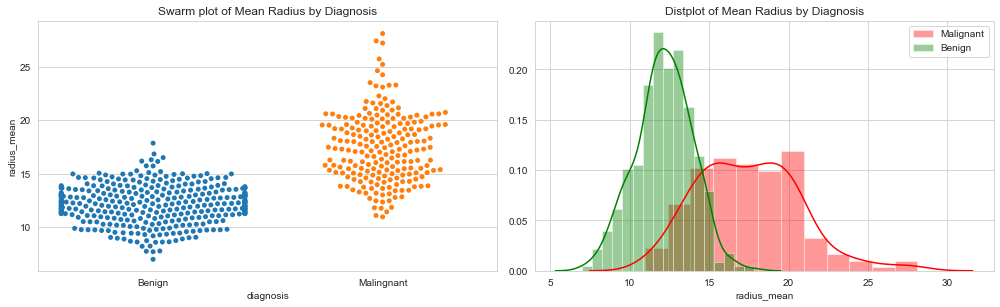

In [16]:

plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
sns.swarmplot(x='diagnosis', y='radius_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Mean Radius by Diagnosis')

plt.subplot(2,2,2)

sns.distplot(df_malignant['radius_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['radius_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Mean Radius by Diagnosis')
plt.tight_layout()

### Observarion
- Mean Radius is the mean of distances from center to points on the perimeter of cell nuclei

- The mean radius for the malignant is much larger than that of the benign one.

- This is also witnessed by the swarm plot and the density plot. 

- The data points for the benign are compact, but for the malignant the data points are scattered as can be seen from the swarm plot and the density plot.

## Mean Texture



In [17]:
bca_df.groupby(['diagnosis'])['texture_mean'].mean()

diagnosis
0    17.914762
1    21.604906
Name: texture_mean, dtype: float64

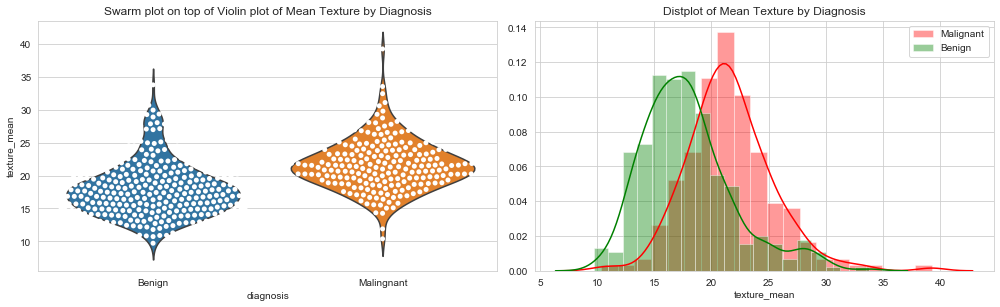

In [18]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)

sns.violinplot(x='diagnosis', y='texture_mean', inner=None, data=bca_df)
sns.swarmplot(x='diagnosis', y='texture_mean', data=bca_df, color='white', edgecolor='gray')
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot on top of Violin plot of Mean Texture by Diagnosis')

plt.subplot(2,2,2)
sns.distplot(df_malignant['texture_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['texture_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Mean Texture by Diagnosis')
plt.tight_layout()

## Observation
- Mean texture is standard deviation of gray-scale values of cell nuclei.
- There is some difference in the proportion of meantexture between the malignant and benign. The Malignant nuclei has larger mean texture than the benign.
- We can see from the swarm plot drawn on top of violin plot that both groups data points are compact.

## Mean Perimeter



In [19]:
bca_df.groupby(['diagnosis'])['perimeter_mean'].mean()

diagnosis
0     78.075406
1    115.365377
Name: perimeter_mean, dtype: float64

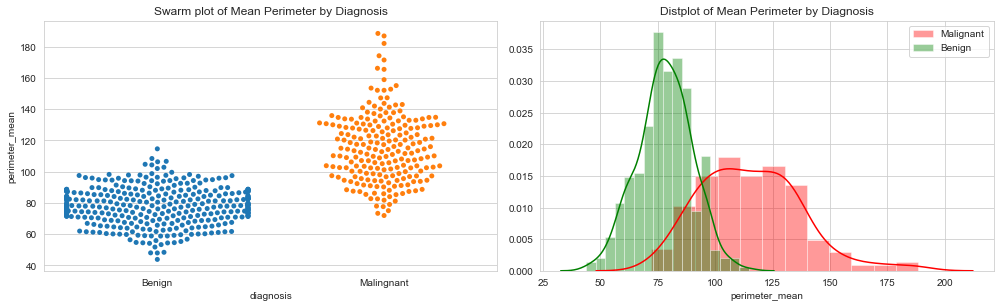

In [20]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
sns.swarmplot(x='diagnosis', y='perimeter_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Mean Perimeter by Diagnosis')

plt.subplot(2,2,2)
sns.distplot(df_malignant['perimeter_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['perimeter_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Mean Perimeter by Diagnosis')
plt.tight_layout()

## Observarion

- Mean preimeter is the mean of the distance around the nuclear border.
- Like the mean radius, the malignat group has notably larger mean of nuclei perimeter as compared to the benign group.
- In addition, the malignant group has a  dispersed data point with some outliers, while the benign has compact data points.

## Mean Area



In [21]:
bca_df.groupby(['diagnosis'])['area_mean'].mean()

diagnosis
0    462.790196
1    978.376415
Name: area_mean, dtype: float64

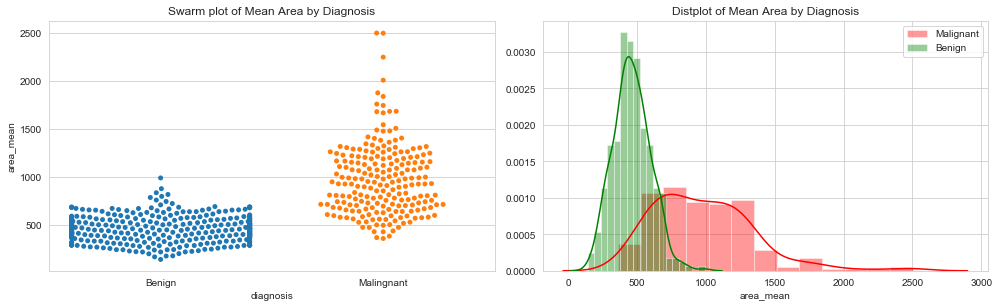

In [22]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
sns.swarmplot(x='diagnosis', y='area_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Mean Area by Diagnosis')

plt.subplot(2,2,2)
sns.distplot(df_malignant['area_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['area_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Mean Area by Diagnosis')
plt.tight_layout()

## Observation

- Mean area is the mean of the area within the outlined nuclear perimeter.
- In line with the findings of mean radius and mean perimeter, the malignant group has extremely large mean area than those of benign group. 
- The malignant group has scattered data points with outliers, whereas the benign one has compact data points.

## Mean Smoothness



In [23]:
bca_df.groupby(['diagnosis'])['smoothness_mean'].mean()

diagnosis
0    0.092476
1    0.102900
Name: smoothness_mean, dtype: float64

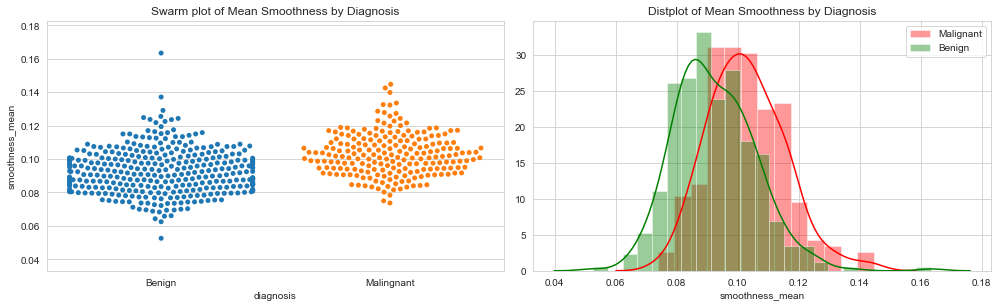

In [24]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
sns.swarmplot(x='diagnosis', y='smoothness_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Mean Smoothness by Diagnosis')

plt.subplot(2,2,2)
sns.distplot(df_malignant['smoothness_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['smoothness_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Mean Smoothness by Diagnosis')
plt.tight_layout()

## Observation
- Mean Smoothness is the local variation in radius lengths of cell nuclei.
- There is slight difference in the mean of smoothness mean between both groups. The mean of smoothness mean of the malignat group is slightly higher than that of the benign group.
- Both groups has compact data points.

## Compactness_mean

In [25]:
bca_df.groupby(['diagnosis'])['compactness_mean'].mean()

diagnosis
0    0.080084
1    0.145187
Name: compactness_mean, dtype: float64

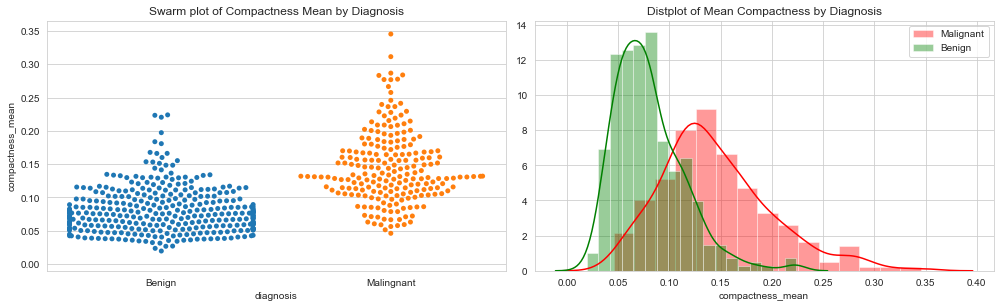

In [26]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)

sns.swarmplot(x='diagnosis', y='compactness_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Compactness Mean by Diagnosis')

plt.subplot(2,2,2)

sns.distplot(df_malignant['compactness_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['compactness_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Mean Compactness by Diagnosis')
plt.tight_layout()

## Observation
- Compactness is a feature drived from two features mentioned above (perimeter, and area). It formula is (perimeter^2 / area - 1.0).
- Like both mean area and and mean perimeter the malignant group has larger mean than the benign group. This is not surprising since it is drived from these two features.

- The malignant group has scattered data points with outliers, whereas the benign one has compact data points.

## Concavity_mean

In [27]:
bca_df.groupby(['diagnosis'])['concavity_mean'].mean()

diagnosis
0    0.046059
1    0.160775
Name: concavity_mean, dtype: float64

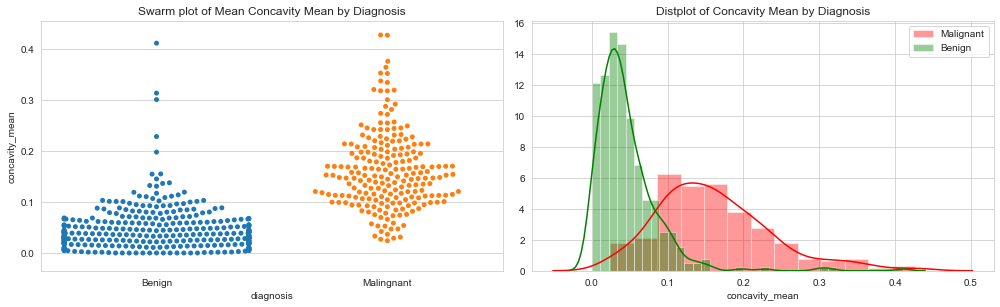

In [28]:
plt.figure(figsize=(14, 8))
plt.subplot(2,2,1)
sns.swarmplot(x='diagnosis', y='concavity_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Mean Concavity Mean by Diagnosis')

plt.subplot(2,2,2)

sns.distplot(df_malignant['concavity_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['concavity_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Concavity Mean by Diagnosis')
plt.tight_layout()

## Observation

- Concavity mean is the mean severity of concave portions of the contour
- The malignant nuclei image has larger mean of concavity mean than the benign one.
- The malignat group has scattered datapoints with some outliers, whereas the benign group has compact data points with few outliers.

## Concave points_mean

In [29]:
bca_df.groupby(['diagnosis'])['concave points_mean'].mean()

diagnosis
0    0.025717
1    0.087986
Name: concave points_mean, dtype: float64

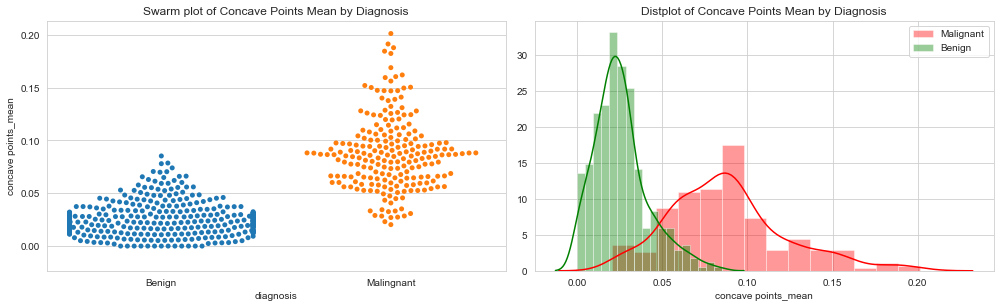

In [30]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
sns.swarmplot(x='diagnosis', y='concave points_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Concave Points Mean by Diagnosis')

plt.subplot(2,2,2)

sns.distplot(df_malignant['concave points_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['concave points_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Concave Points Mean by Diagnosis')
plt.tight_layout()

## Obsservation

- Concave points mean is the mean of the number of concave portions of the contour.

- From the above chart we can see that the difference in mean and the distribution of concave points mean is simailar to that of concavity mean. 
- The malignant nuclei image has larger mean of concavity mean than the benign one.
- The malignat group has scattered datapoints with some outliers, whereas the benign group has compact data points with few outliers.

## Symmetry_mean

In [31]:
bca_df.groupby(['diagnosis'])['symmetry_mean'].mean()


diagnosis
0    0.174186
1    0.192909
Name: symmetry_mean, dtype: float64

Text(0.5, 1.0, 'Distplot of Symmetry Mean by Diagnosis')

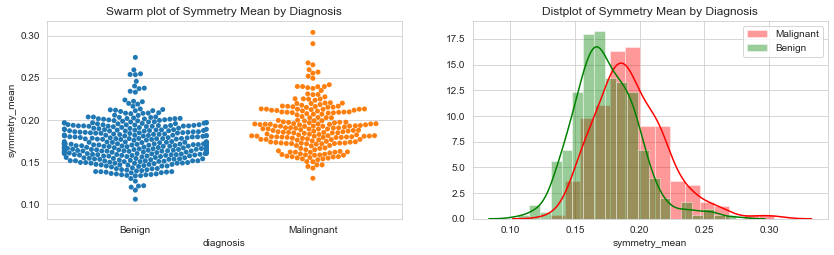

In [32]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
sns.swarmplot(x='diagnosis', y='symmetry_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Symmetry Mean by Diagnosis')

plt.subplot(2,2,2)

sns.distplot(df_malignant['symmetry_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['symmetry_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Symmetry Mean by Diagnosis')

## Observation
- There is no big difference in the mean of symmetry mean between the two groups. The malignant group has slightly higher mean than the benign group.
- Both groups have compact bell shaped distribustion with few outliers.


## Fractal_dimension_mean ("coastline approximation" - 1)



In [33]:
bca_df.groupby(['diagnosis'])['fractal_dimension_mean'].mean()

diagnosis
0    0.062868
1    0.062678
Name: fractal_dimension_mean, dtype: float64

Text(0.5, 1.0, 'Distplot of Fractal Dimension Mean by Diagnosis')

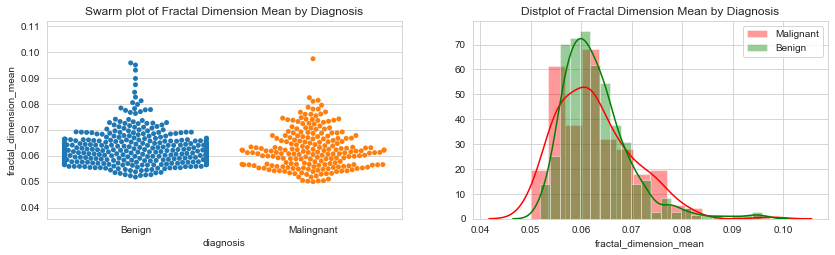

In [34]:
plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)

sns.swarmplot(x='diagnosis', y='fractal_dimension_mean', data=bca_df)
plt.xticks(np.arange(2), ['Benign', 'Malingnant'], rotation=0)
plt.title('Swarm plot of Fractal Dimension Mean by Diagnosis')

plt.subplot(2,2,2)

sns.distplot(df_malignant['fractal_dimension_mean'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['fractal_dimension_mean'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of Fractal Dimension Mean by Diagnosis')

### Observation
- Fractal dimensionwas approximated using the “coastline approximation” described by Mandelbrot that measured nuclear border irregularity
- The mean of fractal dimension mean is almost the same for both groups.
- Both groups has also similar distribution of data points.


### Draw the distplot of the ten standard error varaibles derived from the ten real valued features

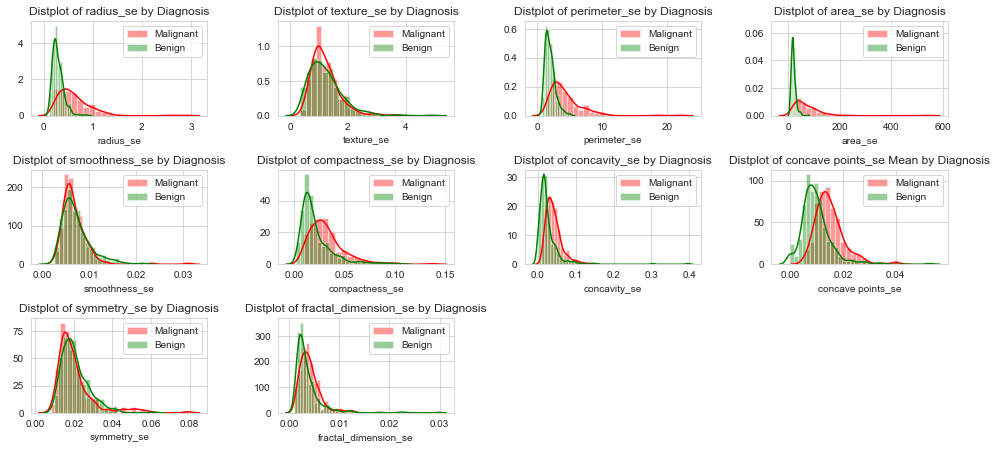

In [35]:
plt.figure(figsize=(14, 8))
plt.subplot(4,4,1)

sns.distplot(df_malignant['radius_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['radius_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of radius_se by Diagnosis')

plt.subplot(4,4,2)

sns.distplot(df_malignant['texture_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['texture_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of texture_se by Diagnosis')

plt.subplot(4,4,3)

sns.distplot(df_malignant['perimeter_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['perimeter_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of perimeter_se by Diagnosis')

plt.subplot(4,4,4)

sns.distplot(df_malignant['area_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['area_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of area_se by Diagnosis')

plt.subplot(4,4,5)

sns.distplot(df_malignant['smoothness_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['smoothness_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of smoothness_se by Diagnosis')

plt.subplot(4,4,6)

sns.distplot(df_malignant['compactness_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['compactness_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of compactness_se by Diagnosis')

plt.subplot(4,4,7)

sns.distplot(df_malignant['concavity_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['concavity_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of concavity_se by Diagnosis')

plt.subplot(4,4,8)

sns.distplot(df_malignant['concave points_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['concave points_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of concave points_se Mean by Diagnosis')

plt.subplot(4,4,9)

sns.distplot(df_malignant['symmetry_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['symmetry_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of symmetry_se by Diagnosis')

plt.subplot(4,4,10)

sns.distplot(df_malignant['fractal_dimension_se'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['fractal_dimension_se'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of fractal_dimension_se by Diagnosis')

plt.tight_layout()

### Observation
- The ten features displayed above are the standard errors for the for the ten real valued features. Features like 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se' showed slight difference in standard error between malignan and benign groups. The rest didn't show any difference in standard error.

### Draw the distplot of the ten worst mean varaibles derived from the ten real valued features

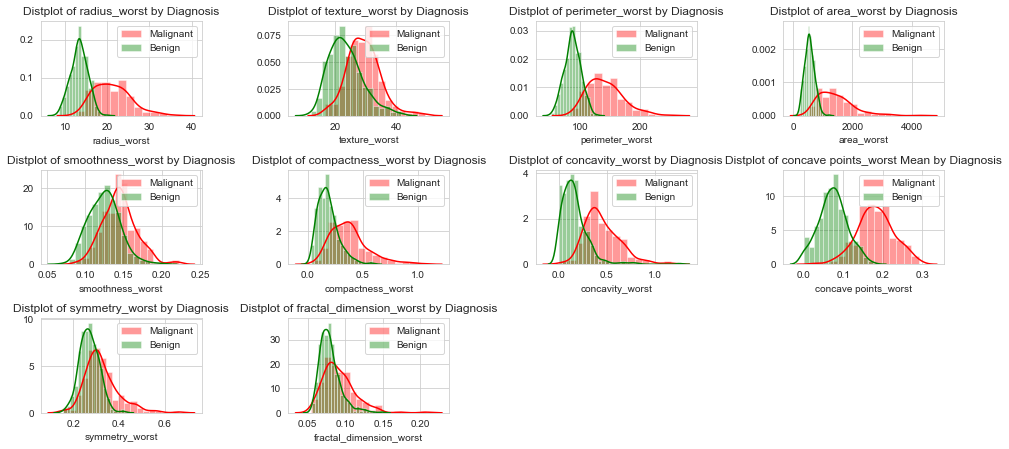

In [36]:
plt.figure(figsize=(14, 8))
plt.subplot(4,4,1)

sns.distplot(df_malignant['radius_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['radius_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of radius_worst by Diagnosis')

plt.subplot(4,4,2)

sns.distplot(df_malignant['texture_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['texture_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of texture_worst by Diagnosis')

plt.subplot(4,4,3)

sns.distplot(df_malignant['perimeter_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['perimeter_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of perimeter_worst by Diagnosis')

plt.subplot(4,4,4)

sns.distplot(df_malignant['area_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['area_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of area_worst by Diagnosis')

plt.subplot(4,4,5)

sns.distplot(df_malignant['smoothness_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['smoothness_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of smoothness_worst by Diagnosis')

plt.subplot(4,4,6)

sns.distplot(df_malignant['compactness_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['compactness_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of compactness_worst by Diagnosis')

plt.subplot(4,4,7)

sns.distplot(df_malignant['concavity_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['concavity_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of concavity_worst by Diagnosis')

plt.subplot(4,4,8)

sns.distplot(df_malignant['concave points_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['concave points_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of concave points_worst Mean by Diagnosis')

plt.subplot(4,4,9)

sns.distplot(df_malignant['symmetry_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['symmetry_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of symmetry_worst by Diagnosis')

plt.subplot(4,4,10)

sns.distplot(df_malignant['fractal_dimension_worst'], kde = True, color='red', label='Malignant')
sns.distplot(df_benign['fractal_dimension_worst'], kde = True, color='green', label='Benign')
plt.legend()
plt.title('Distplot of fractal_dimension_worst by Diagnosis')

plt.tight_layout()

## Observation
- In our case, the suffix 'worst' indicates mean of the three largest values of each of the ten real valued features.
- The above chart indicated that, the malignant group has higher mean than the benign group for all the ten features.
- Features like 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst' showed bigger difference in mean between the malignant and benign group.

## Key Points about the Visual EDA with respect the target variable

#### - Generally, 'radius_mean', 'perimeter_mean', 'concavity_mean',  'concave points_mean' are the three features that seem most relevalnt features for our prediction, followed by 'area_mean', 'compactness_mean', and 'texture_mean'. We observed Higher mean values in malignant group than benign group for all these six features.

#### - On the other hand, in most of the features the malignant groups have scattered data points as compared to the benign groups datapoints.

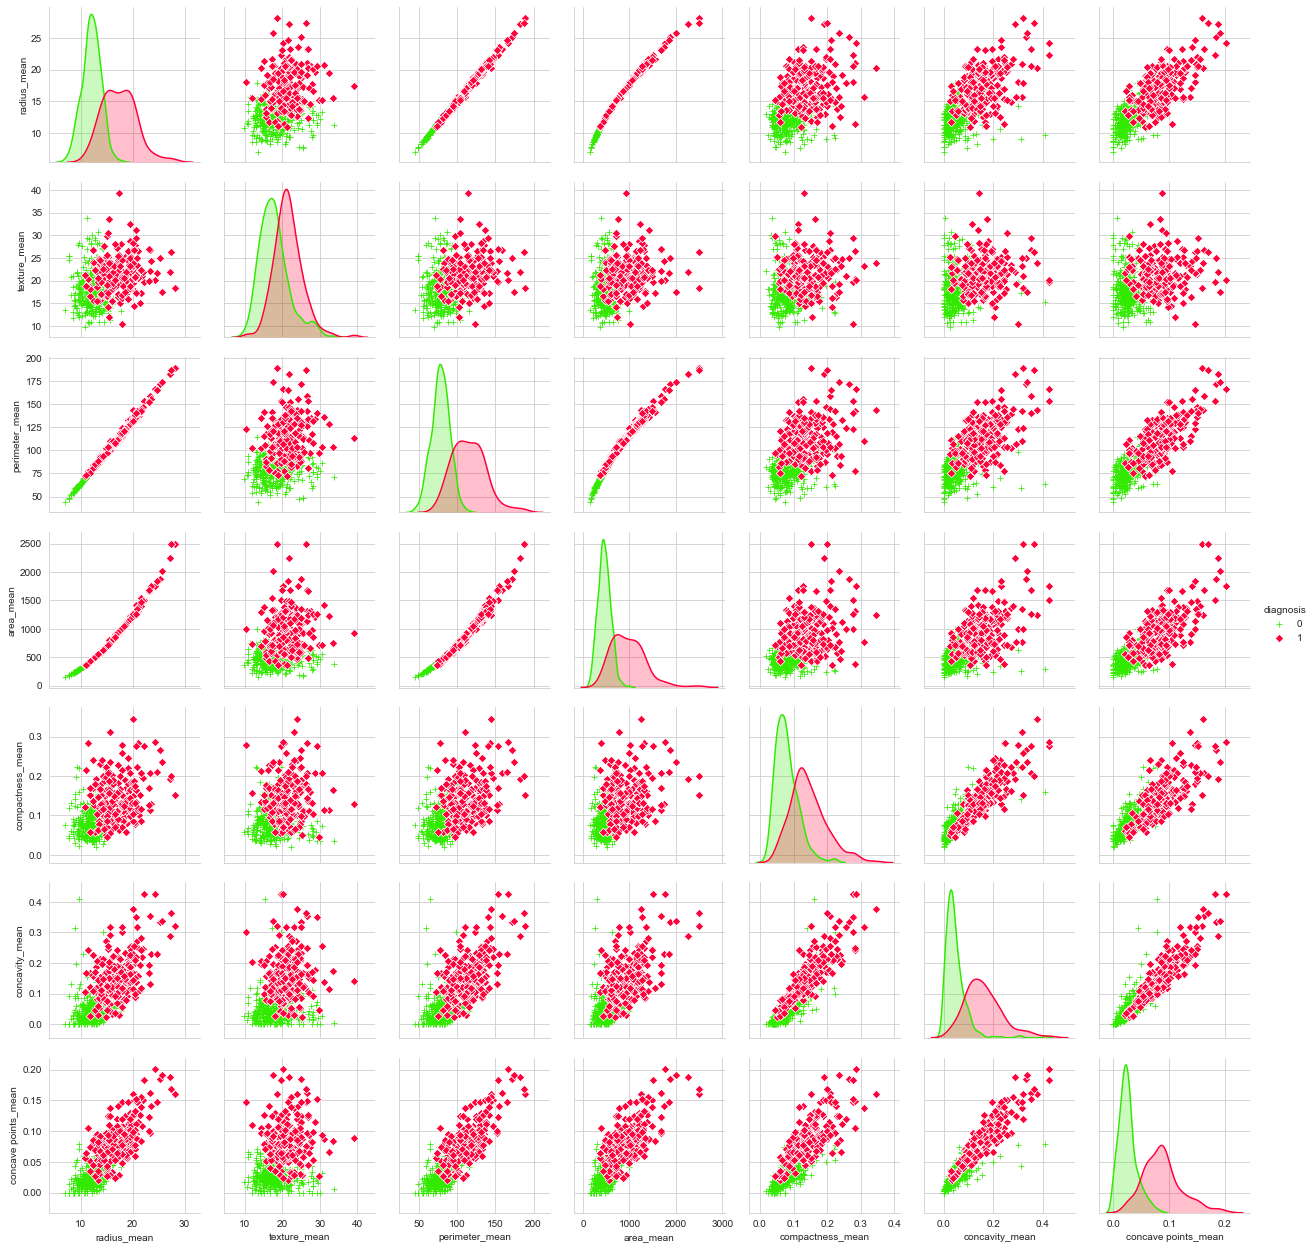

In [37]:
# Let's do pair plot for the six features

pair_df=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean']

sns.pairplot(bca_df, hue="diagnosis", vars=pair_df, markers=['+', 'D'], palette='prism')

## Observation
- On the one hand, the relevance of the six features in classifying the target variable can be clearly seen from the pair plot.
- On the other hand, 'radius_mean', 'perimeter_mean','area_mean' are highly correlated for each other.
- For more information about correlation, we will do corrolation matrix below.

# To Check Correlation


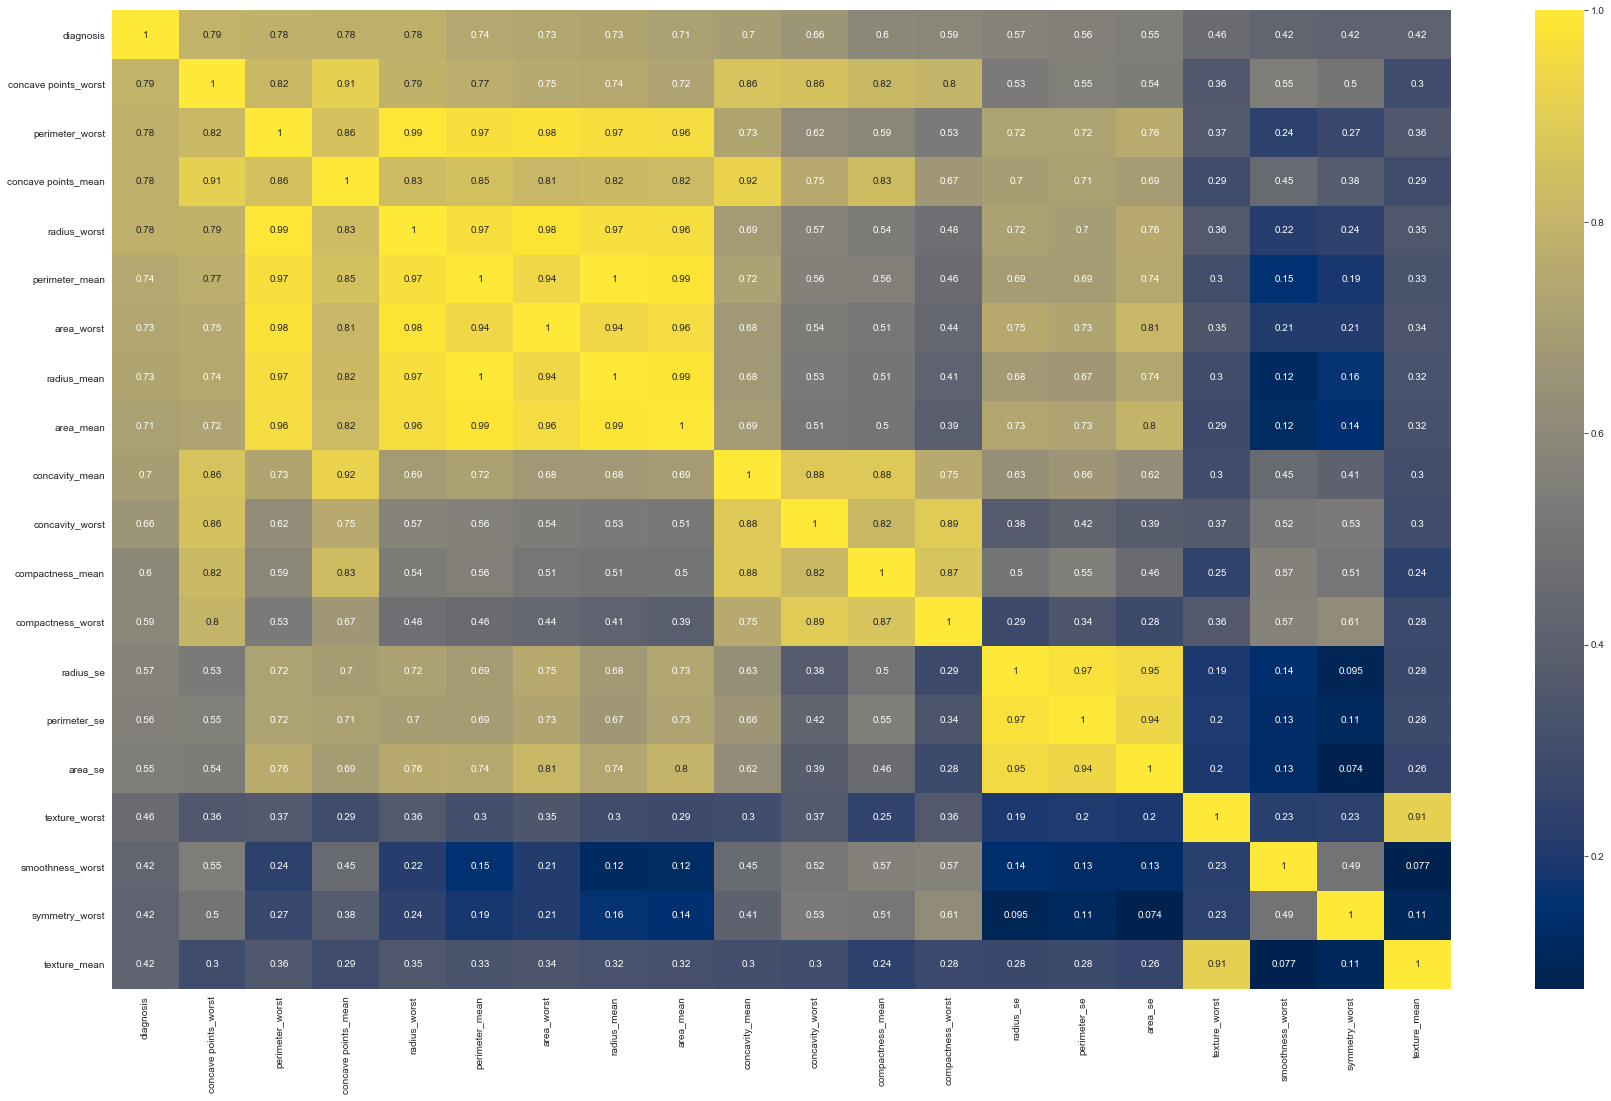

In [38]:
k = 20 #number of variables for heatmap
cols = bca_df.corr().nlargest(k, 'diagnosis')['diagnosis'].index
cm = bca_df[cols].corr()
plt.figure(figsize=(30,18))
sns.heatmap(cm, annot=True, cmap = 'cividis')

# cm.diagnosis


### Correlation with Target variable

- The four top features that have highest corrolation with the target are concave points_worst, perimeter_worst, concave points_mean, radius_worst.

### Correlation among Features

The following features are the most corrolated features with each other

- radius_mean: perimeter_mean,area_mean,perimeter_worst, radius_worst, area_worst
- texture_mean : texture_worst
- area_se: perimeter_se, radius_se
- compactness_mean: compactness_worst, concavity_mean, concavity_worst, concave points_worst,

 # To Handle Outliers
 

In [39]:
# calculate the 2nd percentile and 98th percentile as Q1 and Q3 respectively. Then calculate IQR
Q1 = bca_df.quantile(0.02)
Q3 = bca_df.quantile(0.98)
IQR = Q3 - Q1

# Select dataframe that lies with in the specified interval

bca_clean = bca_df[~((bca_df < (Q1 - 1.5 * IQR)) | (bca_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the total number of benigns and malignats

bca_clean.diagnosis.value_counts()  # We have 355 benigns and 210 malignants. 
                                     # Hence, we remover 2 observations from each groups


bca_clean.shape            # We have 565 overvations and 31 columns

(565, 31)

## To Save The Dataframe In CSV Format

In [40]:
# Save the dataframe in a .csv format with same name
bca_clean.to_csv('bca_clean', index=False)